# Importance sampling of Planck chains with mock DESI Lya likelihoods

Here we read one of the extended Planck chains with linear power parameters, and add an extra likelihood coming from a fake measurement of DESI Lya P1D.

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
from getdist import plots,loadMCSamples
import matplotlib.pyplot as plt
from cup1d.planck import planck_chains
from cup1d.planck import add_linP_params
from cup1d.likelihood import marg_lya_like
# because of black magic, getdist needs this strange order of imports
%matplotlib inline

### Read an extended Planck chains and plot linear power parameters

Planck 2018 with free neutrino mass, already provided in cup1d

In [2]:
add_BAO=True
if add_BAO:
    planck_data='plikHM_TTTEEE_lowl_lowE_BAO'
    planck_label='Planck 2018 + BAO'
    plot_label='Planck_BAO_LyaDESI_mnu'
else:
    planck_data='plikHM_TTTEEE_lowl_lowE'
    planck_label='Planck 2018'
    plot_label='Planck_LyaDESI_mnu'
# model with massive neutrinos
model='base_mnu'
planck2018=planck_chains.get_planck_2018(model=model,data=planck_data)

/global/cfs/cdirs/desi/users/font/Codes/cup1d//data_files/planck_linP_chains/COM_CosmoParams_fullGrid_R3.01//base_mnu/plikHM_TTTEEE_lowl_lowE_BAO/base_mnu_plikHM_TTTEEE_lowl_lowE_BAO_zlinP_10.txt
Removed no burn in


((-2.311216249256435, -2.2875010207435653),
 (0.3135275262592946, 0.38443533974070543))

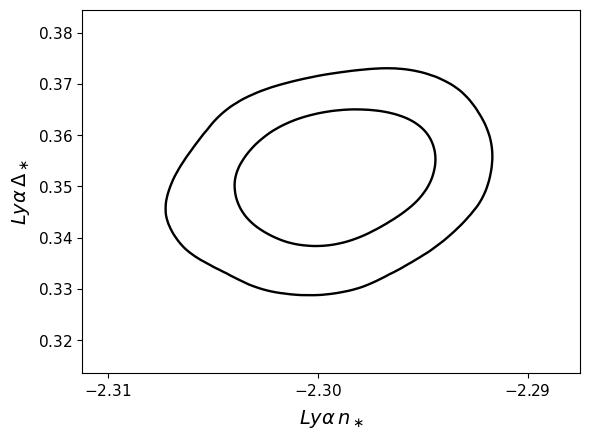

In [3]:
g = plots.getSinglePlotter(width_inch=6)
g.plot_2d(planck2018['samples'], ['linP_n_star', 'linP_DL2_star'])
#g.plot_2d(planck2018['samples'], ['linP_n_star', 'linP_DL2_star'],lims=[-2.4,-2.25,0.2,0.5])

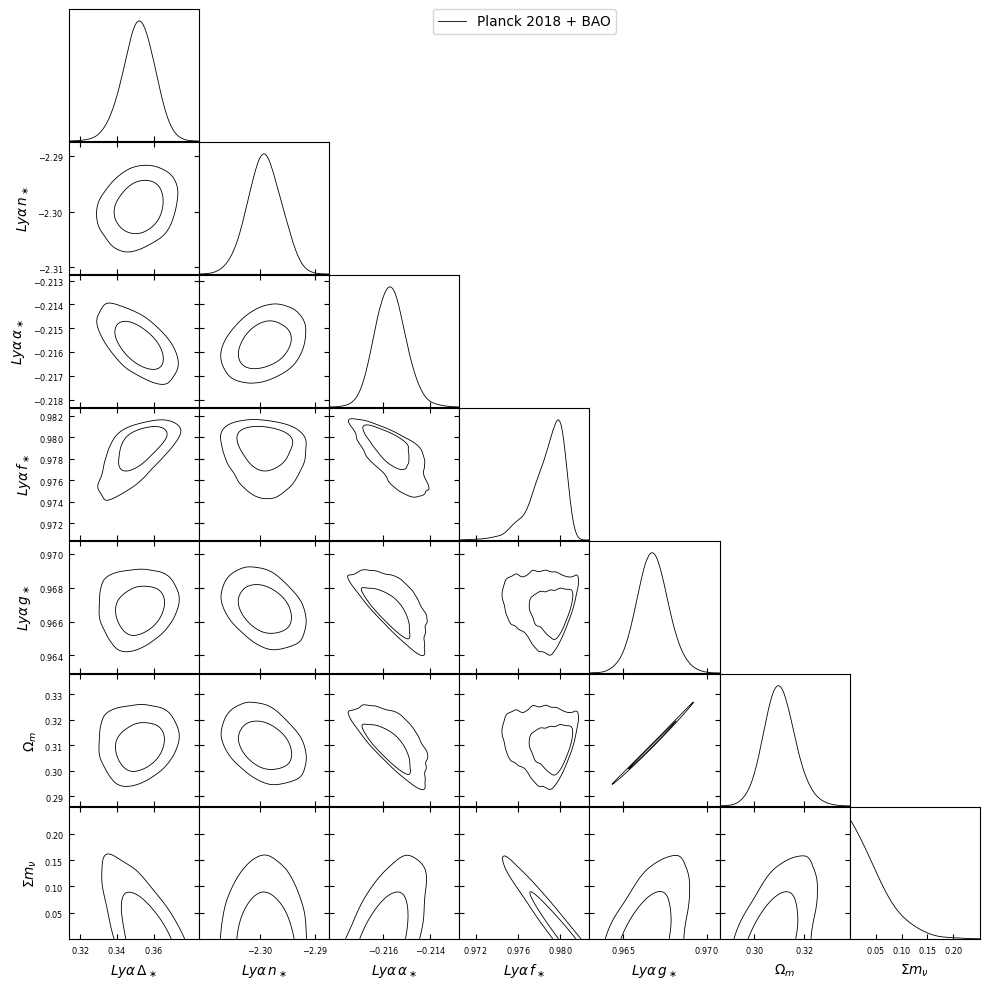

In [4]:
# plot also neutrino mass (for nuLCDM)
g = plots.getSubplotPlotter(width_inch=10)
g.settings.axes_fontsize = 10
g.settings.legend_fontsize = 14
g.triangle_plot(planck2018['samples'],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','linP_g_star','omegam','mnu'],
                legend_labels=[planck_label])

### Add mock DESI Lya likelihood

We will generate three fake DESI likelihoods, for different fiducial values, and see how they affect the cosmo params.

In [5]:
def gaussian_chi2_mock_DESI(neff,DL2,true_DL2=0.35,true_neff=-2.3):
    """Compute Gaussian Delta chi^2 for a particular point(s) (neff,DL2),
    using a mock measurement from DESI (complete made up at this point).
    """
    # DL2 = k^3 P(k) / (2 pi^2), at z=3
    DL2_err=0.003
    # neff = effective slope at kp = 0.009 s/km, i.e., d ln P / dln k
    neff_err=0.002
    # correlation coefficient
    r=0.55
    return marg_lya_like.gaussian_chi2(neff,DL2,true_neff,true_DL2,neff_err,DL2_err,r)

In [6]:
samples_DESI=[]
true_DL2=[0.33,0.35,0.37]
labels_DESI=[]
for DL2 in true_DL2:
    new_samples=planck2018['samples'].copy()
    p=new_samples.getParams()
    new_loglike = 0.5*gaussian_chi2_mock_DESI(p.linP_n_star,p.linP_DL2_star,true_DL2=DL2)
    new_samples.reweightAddingLogLikes(new_loglike) #re-weight cut_samples to account for the new likelihood
    samples_DESI.append(new_samples)
    labels_DESI.append(r'+ DESI Ly$\alpha \, \Delta^2_\ast = ${}'.format(DL2))

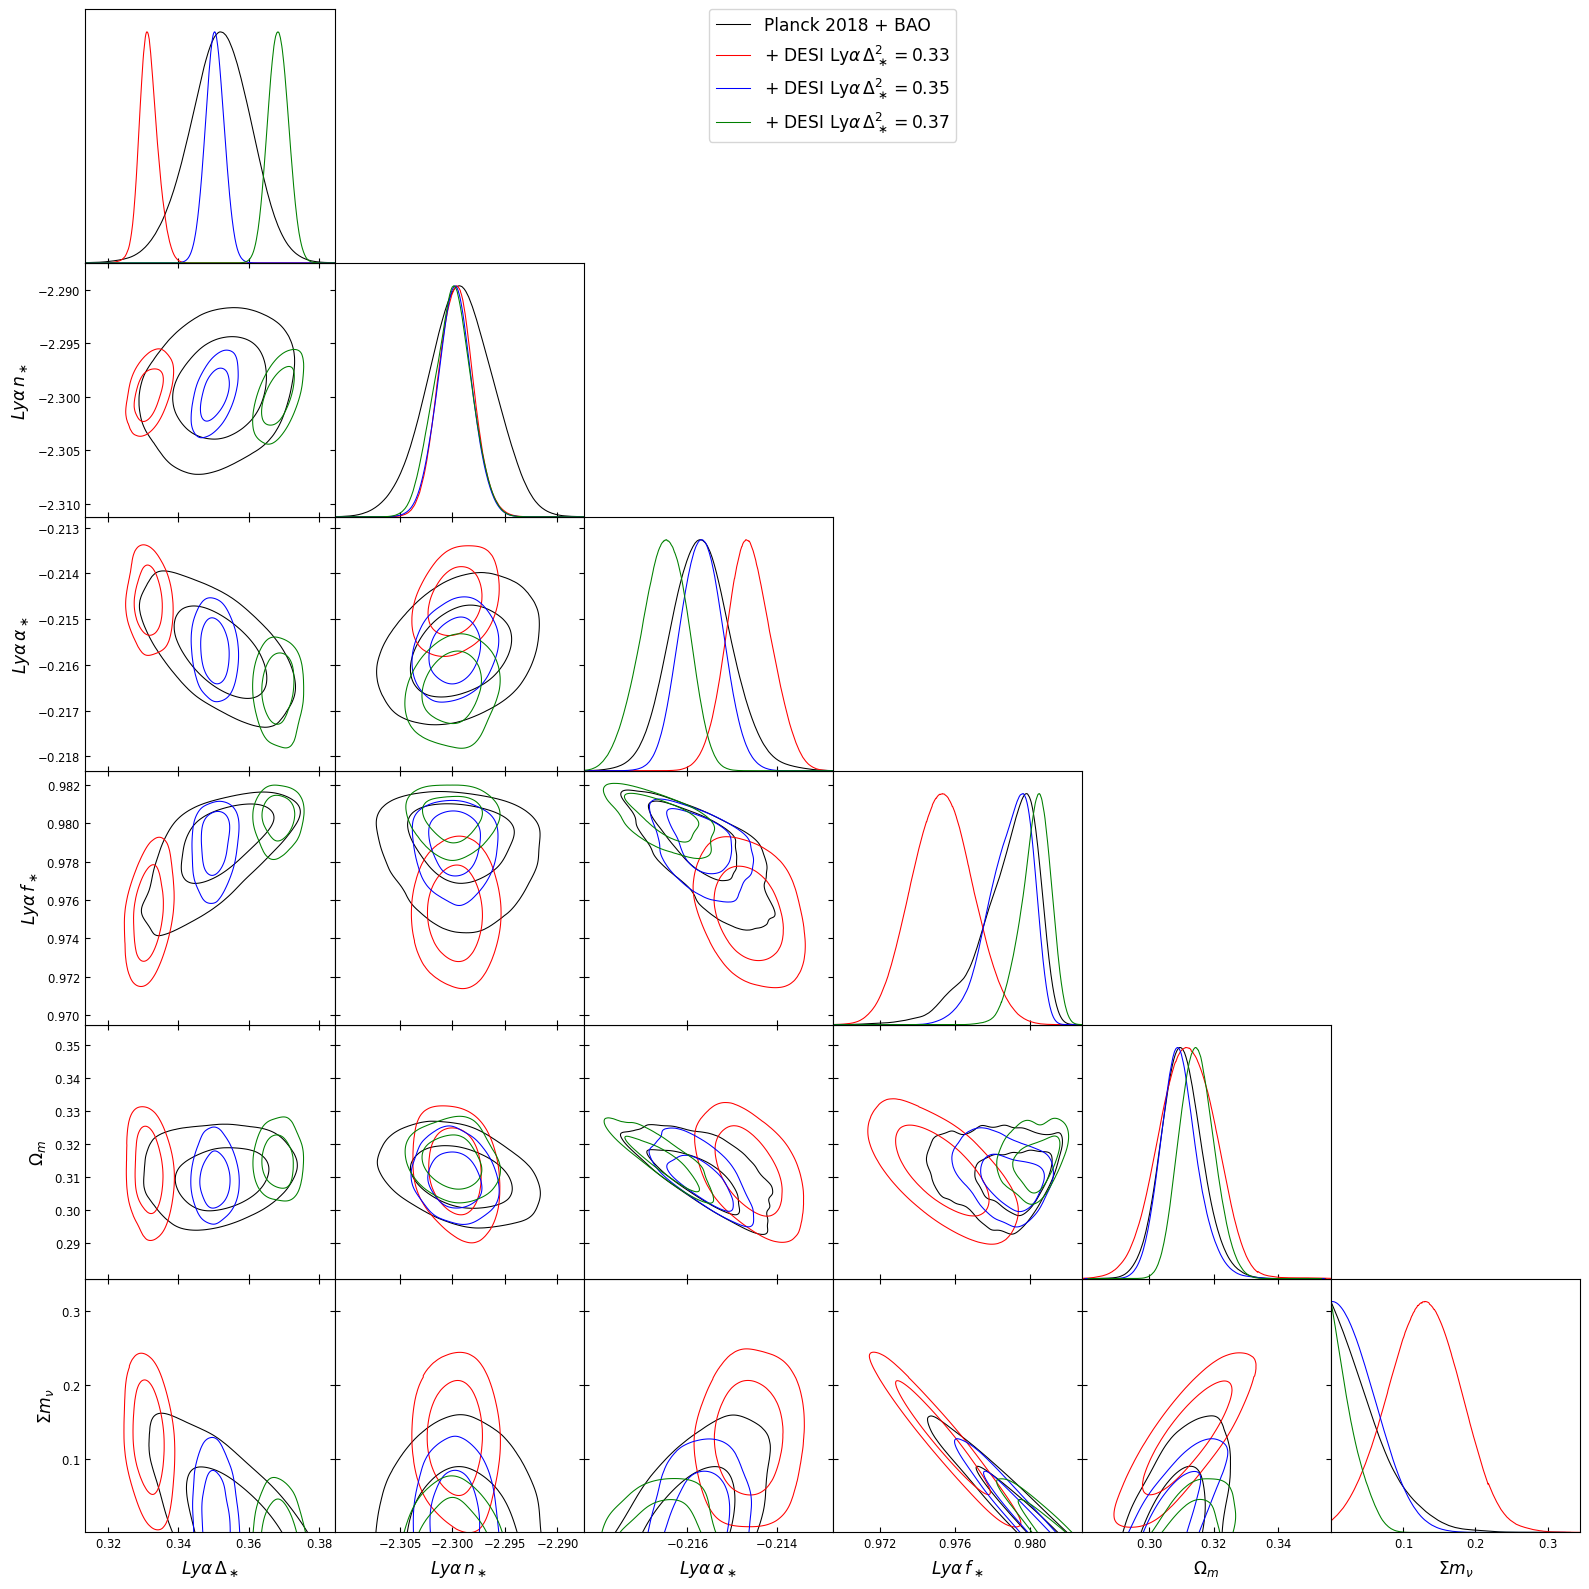

In [7]:
g = plots.getSubplotPlotter(width_inch=16)
g.settings.axes_fontsize = 10
g.settings.legend_fontsize = 14
g.triangle_plot([planck2018['samples'],samples_DESI[0],samples_DESI[1],samples_DESI[2]],
                ['linP_DL2_star','linP_n_star','linP_alpha_star','linP_f_star','omegam','mnu'],
                legend_labels=[planck_label,labels_DESI[0],labels_DESI[1],labels_DESI[2]])

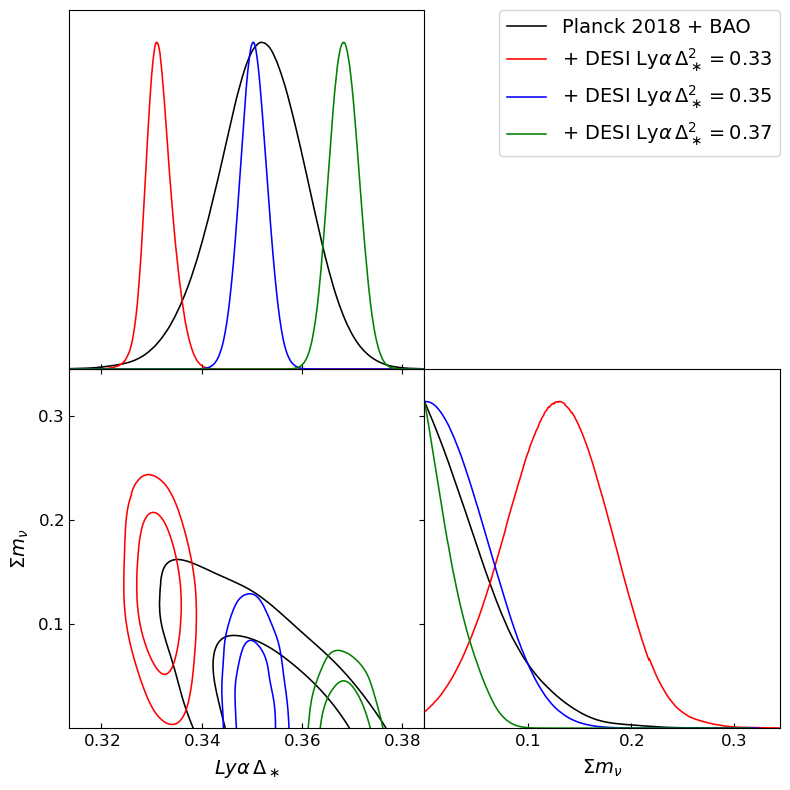

In [8]:
g = plots.getSubplotPlotter(width_inch=8)
g.settings.axes_fontsize = 12
g.settings.legend_fontsize = 14
g.triangle_plot([planck2018['samples'],samples_DESI[0],samples_DESI[1],samples_DESI[2]],
                ['linP_DL2_star','mnu'],
                legend_labels=[planck_label,labels_DESI[0],labels_DESI[1],labels_DESI[2]])
#plt.savefig(plot_label+'.pdf')
#plt.savefig(plot_label+'.png')

In [9]:
print(planck2018['samples'].getInlineLatex('mnu',limit=1))
print(samples_DESI[0].getInlineLatex('mnu',limit=1))
print(samples_DESI[1].getInlineLatex('mnu',limit=1))
print(samples_DESI[2].getInlineLatex('mnu',limit=1))

\Sigma m_\nu < 0.0583
\Sigma m_\nu = 0.130\pm 0.048


\Sigma m_\nu < 0.0557
\Sigma m_\nu < 0.0290


In [10]:
print(planck2018['samples'].getInlineLatex('mnu',limit=2))
print(samples_DESI[0].getInlineLatex('mnu',limit=2))
print(samples_DESI[1].getInlineLatex('mnu',limit=2))
print(samples_DESI[2].getInlineLatex('mnu',limit=2))

\Sigma m_\nu < 0.126
\Sigma m_\nu = 0.130^{+0.086}_{-0.097}
\Sigma m_\nu < 0.105
\Sigma m_\nu < 0.0599
